# Proyecto: Métodos de Interpolación
### Análisis y Predicción de Datos Meteorológicos

Interpolacion (BREVE EXPLICACION)

Los datos sumisnistrados son de la ciudad __Basilea__, en Suiza de 2023; y fueron proporcionados por la pagina __meteoblue__: https://www.meteoblue.com/es/tiempo/archive/export se debe tener en cuenta que los datos se encuentran en un archivo __CSV__, por lo se debe instalar los paquetes necesarios para poder abrir el documento apropiadamente en JULIA.

In [2]:
#INSTALACION DE PAQUETES
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("ForwardDiff")
Pkg.add("Interpolations")

   Resolving package versions...
   Installed Ratios ─────────── v0.4.5
   Installed WoodburyMatrices ─ v1.0.0
   Installed AxisAlgorithms ─── v1.1.0
   Installed Adapt ──────────── v4.0.4
   Installed OffsetArrays ───── v1.14.0
   Installed Interpolations ─── v0.15.1
    Updating `C:\Users\Lai\.julia\environments\v1.6\Project.toml`
  [a98d9a8b] + Interpolations v0.15.1
    Updating `C:\Users\Lai\.julia\environments\v1.6\Manifest.toml`
  [79e6a3ab] + Adapt v4.0.4
  [13072b0f] + AxisAlgorithms v1.1.0
  [a98d9a8b] + Interpolations v0.15.1
  [6fe1bfb0] + OffsetArrays v1.14.0
  [c84ed2f1] + Ratios v0.4.5
  [efce3f68] + WoodburyMatrices v1.0.0
  [8ba89e20] + Distributed
  [1a1011a3] + SharedArrays
Precompiling project...
  ✓ Ratios
  ✓ WoodburyMatrices
  ✓ Adapt
  ✓ AxisAlgorithms
  ✓ OffsetArrays
  ✓ Interpolations
  6 dependencies successfully precompiled in 14 seconds (178 already precompiled)


# Interpolación

### Interpolación de Taylor

"La interpolación de Taylor es una técnica matemática que nos permite aproximar una función complicada mediante un polinomio más simple alrededor de un punto dado, a partir de los valores de la función f y sus
derivadas sucesivas hasta el orden n en el punto x0 y se trata de hallar un Pn(x) de grado menor o igual a n." (metodos numericos,sf)
<br>
Formula:
Pn(n) = f(x0) + Σf'(x0)(x-x0)^n / n!
<br>
donde:
* x0: punto especifico a evaluar derivadas. 
* f(x0): funcion para contruir polinomio.
* x: puntos seleccionados a considerar.
<br>
Pasos:
1. Definir la función y el punto de expansión: Selecciona la función f(x) y el punto que  deseas centrar la expansión de Taylor.
2. Calcular las Derivadas: Calcula las n derivadas de la función en ese punto. Estas derivadas se utilizan para construir el polinomio.
3. Construir Polinomio.
4. Evaluar: Evalúa cada una de las derivadas en el punto de aproximación y multiplica por los correspondientes coeficientes.


Se observa el grafico de los datos seleccionados:

__nota__: se podria elegir estos puntos mediante una funcion random que seleccionaria al azar una semana especifica del año, mediante el paquete 'Dates' el cual seria empleado en una funcion que te permita determinar el inicio y fin del año, para luego calcular las semanas del mismo; pero en este caso como se observa se establecieron los puntos previamente para un mejor manejo de información.
<br>

Día 1: 12.61 C°
Día 2: 10.69 C°
Día 3: 6.59 C°
Día 4: 7.88 C°
Día 5: 10.27 C°
Día 6: 8.69 C°
Día 7: 7.76 C°


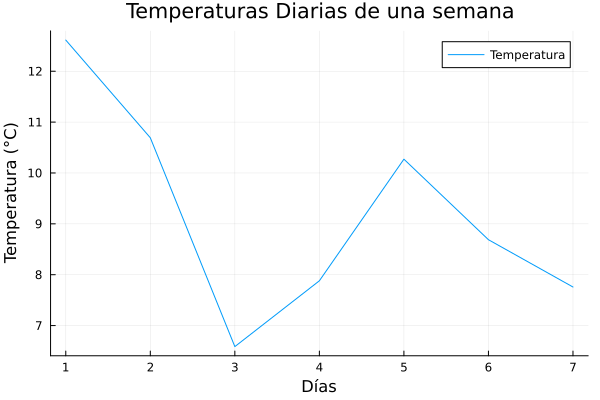

In [31]:
using CSV
using DataFrames

datos = CSV.read("data_Basilea.csv", DataFrame) #lectura del archivo
#promedio de puntos 
lista_promedio =[]
suma =0.0

for i in 10:16 #recorre 7 filas = 7ptos
    for j in 2:4 # recorre columnas
        cambio=parse.(Float64,datos[i, j])
        suma+=cambio
    end
    promedio = suma/ 3 #calcula promedio de temperatura baja, media y alta de un dia
    push!(lista_promedio, promedio) #agregrar en una lista
    suma=0.0 #limpia suma para pasar a la siguiente fila
end

#output dias seleccionados
for dia in 1:length(lista_promedio)
    println("Día ",dia,": ",round(lista_promedio[dia],digits=2)," C°")
end
#grafica de puntos seleccionados
plot(1:length(lista_promedio),lista_promedio, label="Temperatura", xlabel="Días", ylabel="Temperatura (°C)", title="Temperaturas Diarias de una semana")

Aplicando interpolacion de Taylor en Julia:
<br>
Mediante los datos de entrada que serian los dias de una semana, se puede busca predecir un punto especifico, en este caso se tomara la primera semana del 2023 que va el del 1 al 7 de enero, y el punto a evaluar para la predicción es el punto 1.2

El valor aproximado de f(1.2) usando la interpolación de Taylor de grado 7 es: 11.05


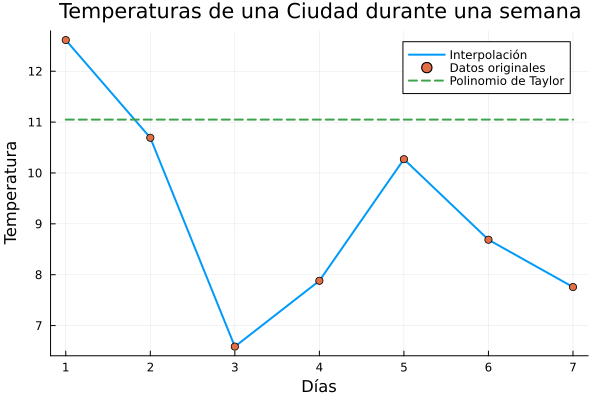

In [24]:
# Importar paquetes
using CSV #abrir archivo
using DataFrames #como se presenta archivo
using ForwardDiff #calculo de derivadas
using Interpolations #calcula interpolacion
using Plots #grafica

# Leer el archivo CSV
datos = CSV.read("data_Basilea.csv", DataFrame)

# Promedio de puntos 
lista_promedio = []
suma = 0.0

for i in 10:16 # Recorre 7 filas = 7 puntos
    for j in 2:4 # Recorre columnas
        cambio = parse(Float64, datos[i, j])
        suma += cambio
    end
    promedio = suma / 3 # Calcula promedio de temperatura baja, media y alta de un día
    push!(lista_promedio, promedio) # Agrega el promedio a la lista
    suma = 0.0 # Limpia suma para pasar a la siguiente fila
end

# Datos del clima 
valoresY = lista_promedio
valoresX = 1:length(valoresY)

# Interpolación de los datos
interpolacion_datos_seleccionados = interpolate((valoresX,), valoresY, Gridded(Linear()))
f(x) = interpolacion_datos_seleccionados(x)

# Calcular las derivadas de f en el punto a
df(a) = ForwardDiff.derivative(f, a) #derivada
derivadas = [df(a) for a in valoresX] #lista comprimida dentor de un ciclo

# Función para calcular el polinomio de Taylor
function taylorInterpolation(f, derivadas, a, n, x)
    # Inicializa el polinomio de Taylor con f(a)
    polinomio = f(a)
    
    # Termino para almacenar el coeficiente factorial
    term = 1.0
    
    for i in 1:n
        #lista de derivadas
        derivative = derivadas[i]
        
        # Calcula el término correspondiente al grado i del polinomio de Taylor
        term *= (x - a) / i
        
        # Actualiza el polinomio de Taylor sumando el nuevo término
        polinomio += derivative * term
    end
    return polinomio
end

# Parámetros a utilizar como base de operación
a = 3  # Punto de expansión (uno de los puntos de los datos)
n = 7  # Grado del polinomio de Taylor
x = 1.2  # Punto donde se quiere evaluar 

# Calcula el polinomio de Taylor y lo evalúa en x
prediccion = taylorInterpolation(f, derivadas, a, n, x)
redondeo =round(prediccion, digits=2)
println("El valor aproximado de f($x) usando la interpolación de Taylor de grado $n es: $redondeo")

# Crear un rango de valores para x
x_range = minimum(valoresX):0.01:maximum(valoresX)

# Evaluar la función interpolada y el polinomio de Taylor en el rango de valores de x
interpolated_values = [f(x) for x in x_range]
taylor_values = [prediccion for x in x_range]

# Graficar los datos originales, la función interpolada y el polinomio de Taylor
plot(x_range, interpolated_values, label="Interpolación", xlabel="Días", ylabel="Temperatura", linewidth=2,title="Temperaturas de una Ciudad durante una semana")
scatter!(valoresX, valoresY, label="Datos originales")
plot!(x_range, taylor_values, label="Polinomio de Taylor", linestyle=:dash, linewidth=2)

### Interpolación de Lagrange

La interpolación de Lagrange es un método numérico utilizado para aproximar funciones a partir de puntos conocidos.
<br>

Pasos:
1. Definir de puntos conocidos: Supongamos que tenemos una función (f(x)) de la que solo conocemos sus valores en ciertos puntos (xi), con (i) desde 0 hasta (n-1). Es decir, tenemos (n) puntos ((xi, yi)) donde (yi = f(xi)).
2. Construimos un polinomio (P(x)) de grado (n-1). (Polinomio de Lagrange)
3. Evaluación del polinomio interpolante: Una vez construido el polinomio (P(x)), podemos usarlo para aproximar (f(x)) en otros puntos.

Valor interpolado en x = 1.2 es 13.46 C°


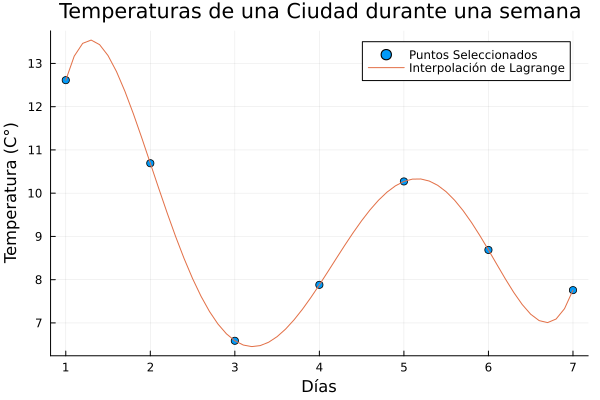

In [23]:
# Importar paquetes
using CSV
using DataFrames
using LinearAlgebra 
using Plots

# Leer el archivo CSV
datos = CSV.read("data_Basilea.csv", DataFrame) #lectura del archivo

# Promedio de puntos 
lista_promedio = []
suma = 0.0

for i in 10:16 # Recorre 7 filas = 7 puntos
    for j in 2:4 # Recorre columnas
        cambio = parse(Float64, datos[i, j])
        suma += cambio
    end
    promedio = suma / 3 # Calcula promedio de temperatura baja, media y alta de un día
    push!(lista_promedio, promedio) # Agrega el promedio a la lista
    suma = 0.0 # Limpia suma para pasar a la siguiente fila
end
#calcula interpolacion
function lagrangeInterpolacion(x, y, x0)
    n = length(x)
    result = 0.0
    for i in 1:n
        basis = 1.0
        for j in 1:n
            if i!= j
                basis *= (x0 - x[j]) / (x[i] - x[j])
            end
        end
        result += y[i] * basis
    end
    return result
end

valoresx = 1:length(lista_promedio)  # Valores x: dias del 1 al 7
valoresy = lista_promedio            # Valores y: clima

x_range = minimum(valoresx):0.1:maximum(valoresx)  # Rango de valores x
y_range = lagrangeInterpolacion.(Ref(valoresx), Ref(valoresy), x_range)  # Interpolación de Lagrange para cada valor en el rango

x0 = 1.2  # Punto a interpolar
y0 = lagrangeInterpolacion(valoresx, valoresy, x0)  # Interpolación de Lagrange en el punto x0

println("Valor interpolado en x = ", x0, " es ", round(y0,digits=2)," C°")

# Graficar los datos originales y la interpolación de Lagrange
scatter(valoresx, valoresy, label="Puntos Seleccionados", xlabel="Días", ylabel="Temperatura (C°)", title="Temperaturas de una Ciudad durante una semana")
plot!(x_range, y_range, label="Interpolación de Lagrange")

### Interpolación de Hermite

La interpolación de Hermite es un metodo de interpolación de puntos de datos como una funcion <br>
polinomica en el analisis numerico. El metodo consiste en calcular un polinomio de grado lo mas bajo <br>
posible que coincida con una funcion desconocida tanto en el valor observado como en el valor observado <br>
de sus priemras m derivadas.

__Formula:__ <br>

p(x) = f[wo] + f[wo,w1](x - wo) + f[wo,w1,w2](x - wo)(x-w1) + .... + f[w0,w1,w2,...,wn](x - wo)...(x - wn)  <br>

#### Pasos para hacer interpolacion de hermite: <br>

__paso 1__: obtener mi vector con las temperaturas de una ciudad en una semana <br>

temperaturas = [valor1, valor2, valor3, valor4, valor5, valor6, valor7] <br>

__paso 2__: obtener mi vector con los dias de la semana <br>

dias = [1,2,3,4,5,6,7] <br>

__paso 3__: obtener derivadas aproximadas <br>

f'(xi) = f(xi+1) - f(xi) / h <br>

donde: --> h = representa la diferencia de dias (en este caso la diferencia de dias es igual a 1)

__paso 4__: obtener la tabla de diferencias divididas <br>

f[x,xi] = f(xi) - f(x) / xi - x

antes de este paso ya debemos de tener definido los f(xi) y f'(xi) <br>

en este caso tenemos 7 puntos (repesentado por los dias de la semana) <br>

Datos Generales:

xo = 1 ------ f(x0) = 20 ------ f'(x0) = resultado de las derivadas aproximadas <br>
x1 = 2 ------ f(x1) = 19 ------ f'(x1) = resultado de las derivadas aproximadas <br>
x2 = 3 ------ f(x2) = 16 ------ f'(x2) = resultado de las derivadas aproximadas <br>
x3 = 4 ------ f(x3) = 22 ------ f'(x3) = resultado de las derivadas aproximadas <br>
x4 = 5 ------ f(x4) = 17 ------ f'(x4) = resultado de las derivadas aproximadas <br>
x5 = 6 ------ f(x5) = 24 ------ f'(x5) = resultado de las derivadas aproximadas <br>
x6 = 7 ------ f(x6) = 14 ------ f'(x6) = resultado de las derivadas aproximadas <br>

k = 14
n = 14 - 1 = 13 columnas de diferencias divididas

Datos a Conseguir:

wo  = 1 (x0) ------ f(w0)  = 20 ------ .... <br>
w1  = 1 (x0) ------ f(w1)  = 20 ------ .... <br>
w2  = 2 (x1) ------ f(w2)  = 19 ------ .... <br>
w3  = 2 (x1) ------ f(w3)  = 19 ------ .... <br>
w4  = 3 (x2) ------ f(w4)  = 16 ------ .... <br>
w5  = 3 (x2) ------ f(w5)  = 16 ------ .... <br>
w6  = 4 (x3) ------ f(w6)  = 22 ------ .... <br>
w7  = 4 (x3) ------ f(w7)  = 22 ------ .... <br>
w8  = 5 (x4) ------ f(w8)  = 17 ------ .... <br>
w9  = 5 (x4) ------ f(w9)  = 17 ------ .... <br>
w10 = 6 (x5) ------ f(w10) = 24 ------ .... <br>
w11 = 6 (x5) ------ f(w11) = 24 ------ .... <br>
w12 = 7 (x6) ------ f(w12) = 14 ------ .... <br>
w13 = 7 (x6) ------ f(w13) = 14 ------ .... <br>

__paso 5__: calculamos el polinomio de Hermite <br>

__paso 6__: Graficar los datos originales y luego el polinimo de hermite

In [34]:
# Metodos de la Interpolacion de Hermite

# funcion para calcular la derivada aproximada de cada dia
function derivadas_aproximadas(derivadas,dias,temperaturas)
    longitud = length(dias)

    for i in 1:longitud-1
        dy = (temperaturas[i+1] - temperaturas[i]) / h
        derivadas[i] = dy
    end
end



# funcion para encontrar los valores de las diferencias divididas
function tabla_diferencias_divididas(matriz,dias,temperaturas,derivadas)

    f,c = size(matriz)
    ordenados = -1

    for i in 1:c
        k = 1
        for j in 1:f
            
            if i == 1
                matriz[j,i] = dias[k]
                if j % 2 == 0
                    k += 1
                end

            elseif i == 2
                matriz[j,i] = temperaturas[k]
                if j % 2 == 0
                    k += 1
                end

            elseif i == 3
                
                if j <= (f - ordenados)
                    if matriz[j,1] == matriz[j+1,1]
                        matriz[j,i] = derivadas[Int(matriz[j,1])]
                    
                    else
                        matriz[j,i] = (matriz[j+1,i-1] - matriz[j,i-1]) / (matriz[j+1,1] - matriz[j,1])
                    
                    end
                end
            else 
                
                if j <= (f - ordenados)
                    matriz[j,i] = (matriz[j+1,i-1] - matriz[j,i-1]) / (matriz[j+ordenados,1] - matriz[j,1])
                end
                
            end
        end
        ordenados += 1
    end
end



# funcion para determinar el polinomio de hermite
function polinomio_hermite(matriz,x)

    pol_hermite = 0.0
    fila = 0

    for i in 1:14
        if i == 1
            pol_hermite += matriz[1,i+1]
        else 
            expresion = matriz[1,i+1]

            for j in 1:i-1
                expresion *= (x - matriz[j,1])
            end
            pol_hermite += expresion
        end
    end

    # utilizamos el metodo expand para simplificar el polinomio de hermite
    return pol_hermite
end

polinomio_hermite (generic function with 1 method)

Valor interpolado en x = 3.4 es 7.17 C°
Día 1: 12.61 C°
Día 2: 10.69 C°
Día 3: 6.59 C°
Día 4: 7.88 C°
Día 5: 10.27 C°
Día 6: 8.69 C°
Día 7: 7.76 C°


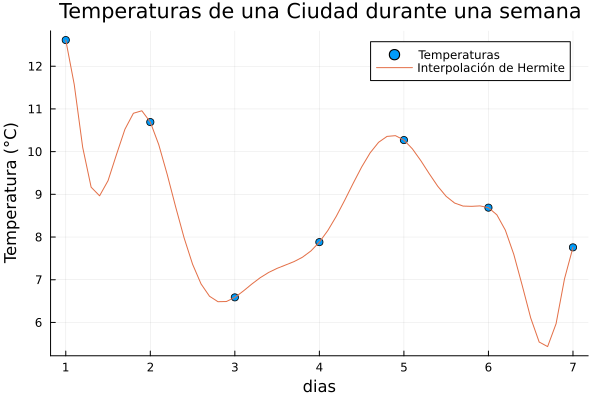

In [35]:
using SymPy

# Declaracion de Variables

dias = [1,2,3,4,5,6,7]
temperaturas = lista_promedio


derivadas = zeros(Float64,7)   # vector con ceros para almacenar las derivadas aproximadas
h = 1   # diferencia entre dias

# hallamos las derivadas aproximadas
derivadas_aproximadas(derivadas,dias,temperaturas)

# obtenemos la cantidad de filas y cantidas de columnas
# las filas se definen por la cantidad de datos, es decir, tenemos 7 f(x) y 7 f'(x)
# las columnas para la diferencias divididas serian filas + 1

filas = length(temperaturas) + length(derivadas)
columnas = filas + 1 

matriz_diferencias_divididas = zeros(Float64,filas,columnas)

# hallamos los valores de la tabla
tabla_diferencias_divididas(matriz_diferencias_divididas,dias,temperaturas,derivadas)

#= Tabla de los valores
println(matriz_diferencias_divididas[:,1])
println(matriz_diferencias_divididas[:,2])
println(matriz_diferencias_divididas[:,3])
println(matriz_diferencias_divididas[:,4])
println(matriz_diferencias_divididas[:,5])
println(matriz_diferencias_divididas[:,6])
println(matriz_diferencias_divididas[:,7])
println(matriz_diferencias_divididas[:,8])
println(matriz_diferencias_divididas[:,9])
println(matriz_diferencias_divididas[:,10])
println(matriz_diferencias_divididas[:,11])
println(matriz_diferencias_divididas[:,12])
println(matriz_diferencias_divididas[:,13])
println(matriz_diferencias_divididas[:,14])
println(matriz_diferencias_divididas[:,15])
=#

# declaramos la incognita x para poder trabajar en la ecuacion del polinomio
@syms x

# hallamos la ecuacion de hermite

# hallamos la aproximacion de un dia equis entre el rango de 1 y 7
valor = polinomio_hermite(matriz_diferencias_divididas,3.4)
println("Valor interpolado en x = ", 3.4, " es ", round(valor,digits=2)," C°")


# Datos para la interpolación que nos va a servir para hacer la grafica del polinomio de Hermite
x_range = minimum(1):0.1:maximum(7)  # Rango de valores x
pol_hermite = zeros(Float64,length(x_range))  # inicializamos el vector en ceros

# calulamos los valores del polinomio hermite paro los datos que se encuentran en el vector x_range
for i in 1:length(x_range)
    valores = polinomio_hermite(matriz_diferencias_divididas,x_range[i])
    pol_hermite[i] = valores
end

# graficamos los puntos originales y a su vez el polinomio de Hermite

# dias seleccionados
for dia in 1:length(lista_promedio)
    println("Día ",dia,": ",round(lista_promedio[dia],digits=2)," C°")
end

scatter(dias,temperaturas,label = "Temperaturas", xlabel = "dias",
ylabel="Temperatura (°C)", title = "Temperaturas de una Ciudad durante una semana")
plot!(x_range, pol_hermite, label="Interpolación de Hermite")

### Interpolación de Polinomicas a Trozos

Valor interpolado en x = 1.2 es 12.41 C°


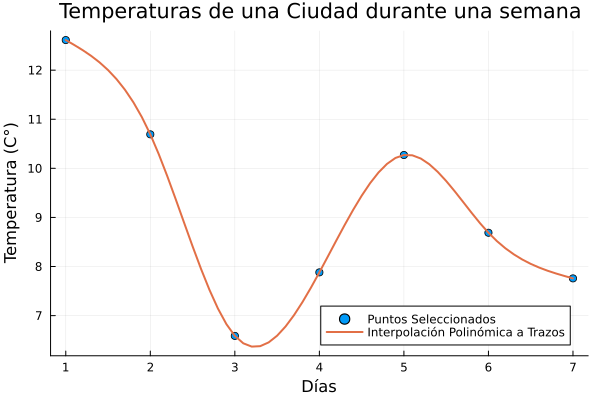

In [25]:
# Importar paquetes
using CSV
using DataFrames
using LinearAlgebra
using Plots
using Interpolations  

# Leer el archivo CSV
datos = CSV.read("data_Basilea.csv", DataFrame) # Lectura del archivo

# Promedio de puntos 
lista_promedio = Float64[]  # Asegurar que es un vector de Float64
suma = 0.0

for i in 10:16 # Recorre 7 filas = 7 puntos
    for j in 2:4 # Recorre columnas
        cambio = parse(Float64, datos[i, j])
        suma += cambio
    end
    promedio = suma / 3 # Calcula promedio de temperatura baja, media y alta de un día
    push!(lista_promedio, promedio) # Agrega el promedio a la lista
    suma = 0.0 # Limpia suma para pasar a la siguiente fila
end

# Datos para interpolación
x_values = 1:length(lista_promedio)  # Valores x
y_values = lista_promedio            # Valores y

# Asegurarse de que y_values es un vector de Float64
y_values = Float64.(y_values)

# Crear interpolación cúbica a trozos
itp = interpolate(y_values, BSpline(Cubic(Line())), OnGrid())
x_range = minimum(x_values):0.1:maximum(x_values)  # Rango de valores x
y_range = [itp(x) for x in x_range]  # Interpolación para cada valor en el rango

x0 = 1.2  # Punto a interpolar
y0 = itp(x0)  # Interpolación en el punto x0

println("Valor interpolado en x = ", x0, " es ", round(y0, digits=2), " C°")

# Graficar los datos originales y la interpolación polinómica a trazos
scatter(x_values, y_values, label="Puntos Seleccionados", xlabel="Días", ylabel="Temperatura (C°)", title="Temperaturas de una Ciudad durante una semana", legend=:bottomright)
plot!(x_range, y_range, label="Interpolación Polinómica a Trazos", lw=2)